In [ ]:
from models.model_trainer import ModelTrainer
from evaluation.evaluator import Evaluator
from data_handling.adult_data import Adult
from visualization.visualizer import Visualizer

adult_instance = Adult()
adult_instance.load_csv('datasets/adult.csv')
features = adult_instance.get_feature_names()

features_of_interest = ['age', 'education', 'income']
adult_instance.select_features(features_of_interest)
adult_instance.encode_categorical_columns()
adult_instance.sample_data(2000)

# Assuming adult_instance and trainer have been set up and used as above
trainer = ModelTrainer()
data = trainer.normalize_columns(adult_instance.data, exclude_columns=['income'])
# Split the data
trainer.split_data(data, target_column='income')
model = trainer.train('logistic_regression')
# evaluator = Evaluator(model, trainer.X_test, trainer.y_test)
# evaluator.evaluate()
# misclassified_samples = evaluator.find_misclassified_samples()

# # Create a visualizer instance
# visualizer = Visualizer(model, data.iloc[:,:2], data.iloc[:, 2], evaluator.y_pred,
#                         features_of_interest[:2])

# # Visualize misclassified samples for the first two features of interest (adjust as needed)
# visualizer.plot_decision_boundary()

evaluator = Evaluator(model, trainer.X_test, trainer.y_test)
evaluator.report()

In [13]:
import sys  
sys.path.insert(1, '/Users/asifahmed/Documents/Codes/MyRecourseProject')

from models.model_trainer import ModelTrainer
from evaluation.evaluator import Evaluator
from visualization.visualizer import Visualizer
from data_handling.adult_data import Adult
from explainability.explainer_factory import get_explainer
import pandas as pd

adult_instance = Adult(target_column = 'income')
adult_instance.load_csv('/Users/asifahmed/Documents/Codes/MyRecourseProject/datasets/raw/adult.csv')
adult_instance.encode_categorical_columns()
adult_instance.select_features(['age', 'hours.per.week', 'income'])
adult_instance.balanced_sample(5000)
print(len(adult_instance.data))
# adult_instance.remove_outliers()

# trainer = ModelTrainer()
# data = trainer.normalize_columns(data=adult_instance.data, exclude_columns='income')
# trainer.split_data(data, target_column='income')
# model = trainer.train('svm')

# evaluator = Evaluator(model, trainer.X_test, trainer.y_test)
# evaluator.report()

# visualizer = Visualizer(model, trainer.X_test, trainer.y_test)
# visualizer.plot_decision_boundary()

CSV file loaded successfully with delimiter: ','
Encoded workclass
Encoded education
Encoded marital.status
Encoded occupation
Encoded relationship
Encoded race
Encoded sex
Encoded native.country
Encoded income
Selected features are now active: ['age', 'hours.per.week', 'income']
10000


In [14]:
adult_instance.merge_duplicates_assign_majority(exclude_column='income')

Duplicates merged and majority value assigned.


In [16]:
adult_instance.print_duplicate_rows_excluding_column(exclude_column='income')


No duplicates found.


Numerical columns normalized.
Data split into train and test sets.
svm model trained successfully.
Accuracy: 0.7152317880794702
Precision: 0.7155963302752294
Recall: 0.5864661654135338
F1 Score: 0.6446280991735537
Confusion Matrix:
 [[138  31]
 [ 55  78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.76       169
           1       0.72      0.59      0.64       133

    accuracy                           0.72       302
   macro avg       0.72      0.70      0.70       302
weighted avg       0.72      0.72      0.71       302



/opt/anaconda3/envs/research/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


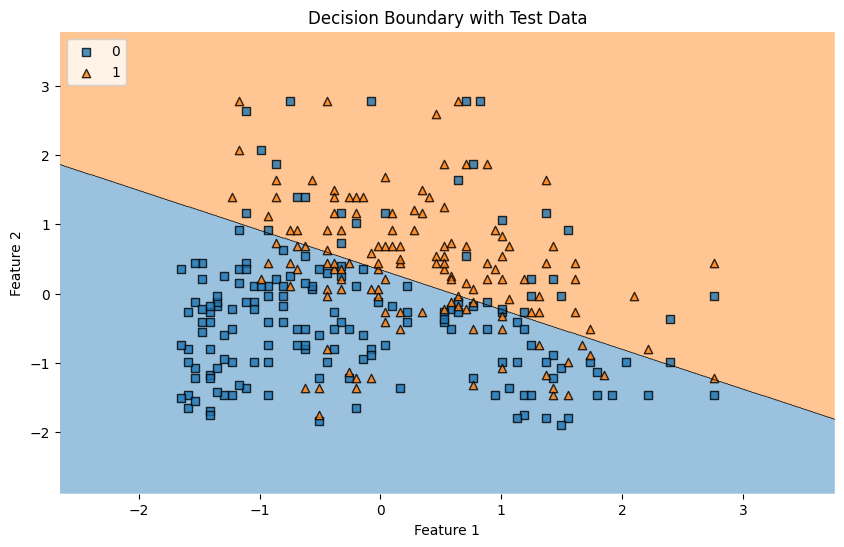

In [17]:
trainer = ModelTrainer()
data = trainer.normalize_columns(data=adult_instance.data, exclude_columns='income')
trainer.split_data(data, target_column='income')
model = trainer.train('svm')

evaluator = Evaluator(model, trainer.X_test, trainer.y_test)
evaluator.report()

visualizer = Visualizer(model, trainer.X_test, trainer.y_test)
visualizer.plot_decision_boundary()

In [ ]:
from models.model_trainer import ModelTrainer
from evaluation.evaluator import Evaluator
from data_handling.adult_data import Adult
from explainability.explainer_factory import get_explainer

# Setup and preprocessing
adult_instance = Adult()
adult_instance.load_csv()
# features_of_interest = ['age', 'education', 'income']
# adult_instance.select_features(features_of_interest)
adult_instance.encode_categorical_columns()
adult_instance.sample_data(2000)

# Train model
trainer = ModelTrainer()
data = trainer.normalize_columns(adult_instance.data, exclude_columns=['income'])
trainer.split_data(data, target_column='income')
model = trainer.train('logistic_regression')

# Generate explanations using DICE
continuous_features = ['age', 'fnlwgt', 'education', 'capital.gain', 'capital.loss', 'hours.per.week']
explainer = get_explainer('dice', model=model, data=adult_instance.data,
                          continuous_features=continuous_features,
                          outcome_name='income')
query_instance = trainer.X_test.iloc[0:1]  # Selecting the first test instance
counterfactuals = explainer.generate_explanation(query_instance, total_CFs=5)

# Evaluate model
evaluator = Evaluator(model, trainer.X_test, trainer.y_test)
evaluator.report()


In [ ]:
from data_handling.bank_data import BankData

# Initialize and load data
bank_instance = BankData()
bank_instance.load_csv()  # loads the default path you've set
# bank_instance.preprocess()  # apply any specific preprocessing steps

# Now, bank_instance.data contains the preprocessed data ready for modeling or analysis
print(bank_instance.get_feature_names())
print(bank_instance.preview_data())
# print(bank_instance.summary_statistics())
print(bank_instance.get_numerical_columns())
bank_instance.plot_histogram()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from models.model_trainer import ModelTrainer
from evaluation.evaluator import Evaluator
from data_handling.adult_data import Adult
from visualization.visualizer import Visualizer


adult_instance = Adult()
adult_instance.load_csv('datasets/adult.csv')

adult_instance.encode_categorical_columns()
adult_instance.sample_data(5000)
adult_instance.select_features(['age','hours.per.week', 'income'])
# print(len(adult_instance.data))

# Train model
trainer = ModelTrainer()
data = trainer.normalize_columns(adult_instance.data, exclude_columns=['income'])
trainer.split_data(data, target_column='income')
model = trainer.train('logistic_regression')

# Assume Adult data has been loaded, processed, and split into features and labels




# # Scaling the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Splitting the dataset
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# # Training the SVM model
# svm_model = SVC(kernel='linear')
# svm_model.fit(X_train, y_train)

# Create an instance of the Visualizer and plot the decision boundary
visualizer = Visualizer(model, trainer.X_test, trainer.y_test)
visualizer.plot_decision_boundary()
evaluator = Evaluator(model, trainer.X_test, trainer.y_test)
evaluator.report()